In [2]:
'''
Each of us shoul be able to explain our part of the code.
Please add comments to your code to explain what each part does.
All team members should be able to run the code and understand the output.
'''

# Import necessary libraries for data handling, model training, and evaluation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,          # Accuracy of the model
    f1_score,                # Harmonic mean of precision and recall
    precision_score,         # Percentage of relevant instances among the retrieved instances
    recall_score,            # Percentage of relevant instances that were retrieved
    confusion_matrix,        # Matrix showing actual vs predicted classifications
    classification_report    # Summary report for precision, recall, f1-score
)
import seaborn as sns       # For visualization (optional in this script)
import matplotlib.pyplot as plt  # For plotting (optional in this script)

# Load the dataset into a DataFrame
df = pd.read_csv("dataset_HR.csv")

# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns    # All numeric columns
cat_cols = df.select_dtypes(include='object').columns                # All object-type columns (categorical)

# Create imputation strategies for missing values
num_imputer = SimpleImputer(strategy='mean')               # Fill missing numeric values with the mean
cat_imputer = SimpleImputer(strategy='most_frequent')      # Fill missing categorical values with the most frequent

# Apply imputations to the respective columns
df[num_cols] = num_imputer.fit_transform(df[num_cols])     # Replace missing numeric data
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])     # Replace missing categorical data

In [3]:
# Convert the target variable 'Attrition' from categorical to numeric
# 'Yes' becomes 1 (employee left), 'No' becomes 0 (employee stayed)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Convert categorical features into dummy/one-hot encoded variables (excluding Attrition)
# drop_first=True helps prevent multicollinearity by dropping the first category in each
df = pd.get_dummies(df, columns=cat_cols.drop('Attrition'), drop_first=True)

# Define feature matrix (X) and target vector (y)
X = df.drop("Attrition", axis=1)  # All columns except the target
y = df["Attrition"]               # Target column

# Split the data into training and testing sets
# test_size=0.2 means 20% test, 80% train
# stratify=y ensures the target class distribution is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the shape of training and testing sets
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

# Show class distribution in training set
print("\nTrain Distribution of 'Attrition':")
print(y_train.value_counts(normalize=True).map("{:.2%}".format))  # Shows percentage format

Train Shape: (960, 14)
Test Shape: (240, 14)

Train Distribution of 'Attrition':
Attrition
0    76.88%
1    23.12%
Name: proportion, dtype: object


ergis part


In [4]:
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier

# Define a Random Forest model with class_weight='balanced' to handle class imbalance
# random_state ensures reproducible results
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

In [5]:
# Print a full classification report showing precision, recall, f1-score, and support
# This is useful to understand how well the model performs on each class individually
print("🎯 Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

🎯 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       185
           1       0.00      0.00      0.00        55

    accuracy                           0.77       240
   macro avg       0.38      0.50      0.43       240
weighted avg       0.59      0.77      0.67       240



from here till end will be presented by alban 

In [6]:
# Calculate individual evaluation metrics to quantitatively assess model performance
acc = accuracy_score(y_test, y_pred)           # Accuracy: overall correctness
f1 = f1_score(y_test, y_pred)                  # F1 Score: balance between precision and recall
prec = precision_score(y_test, y_pred)         # Precision: TP / (TP + FP)
rec = recall_score(y_test, y_pred)             # Recall: TP / (TP + FN)

# Print each metric with 4 decimal places for clarity
print("Evaluation Metrics:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# Optional: Print full classification report again (same as previous cell)
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

Evaluation Metrics:
Accuracy:  0.7667
Precision: 0.0000
Recall:    0.0000
F1-score:  0.0000

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       185
           1       0.00      0.00      0.00        55

    accuracy                           0.77       240
   macro avg       0.38      0.50      0.43       240
weighted avg       0.59      0.77      0.67       240



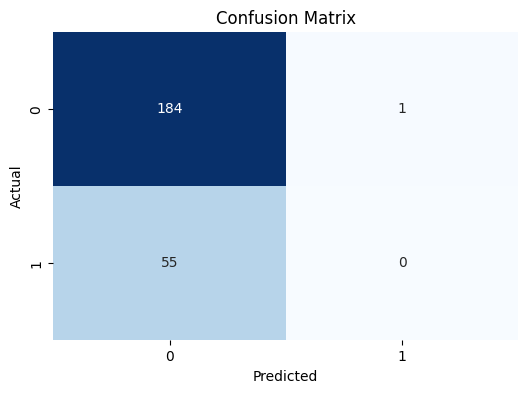

In [7]:
# Generate the confusion matrix, which shows the number of true positives, false positives, etc.
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,4))                         # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # Annotate with numbers, no color bar
plt.xlabel("Predicted")                           # Label for x-axis
plt.ylabel("Actual")                              # Label for y-axis
plt.title("Confusion Matrix")                  # Title of the plot
plt.show()                                        # Display the plot